<a href="https://colab.research.google.com/github/avionerman/Google-HashCode2017/blob/master/exe1_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import section

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Read the dataset & get attrs statistical descriptions.

In [5]:
df = pd.read_csv('diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Visualize each attribute

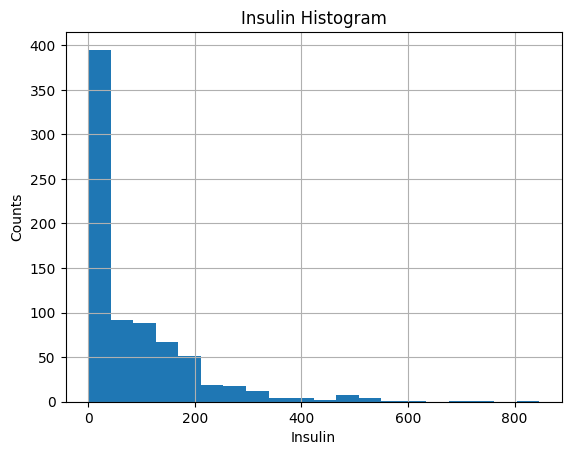

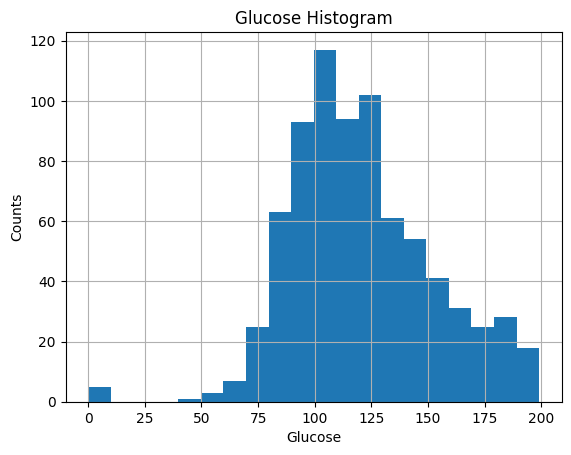

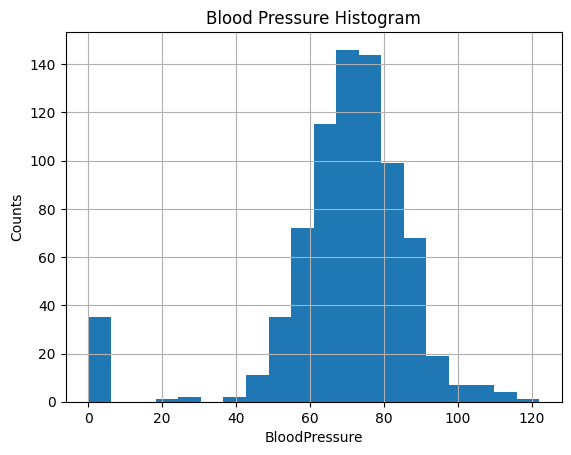

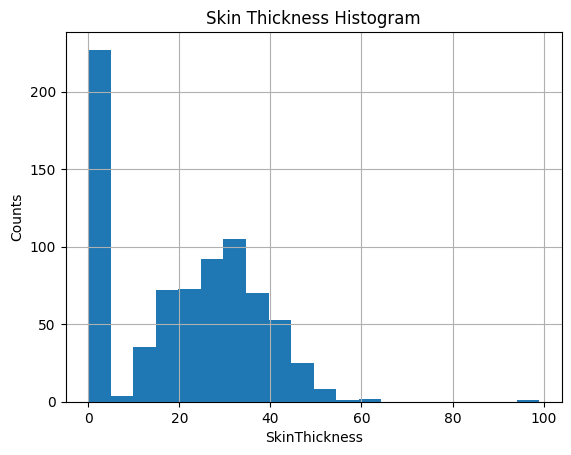

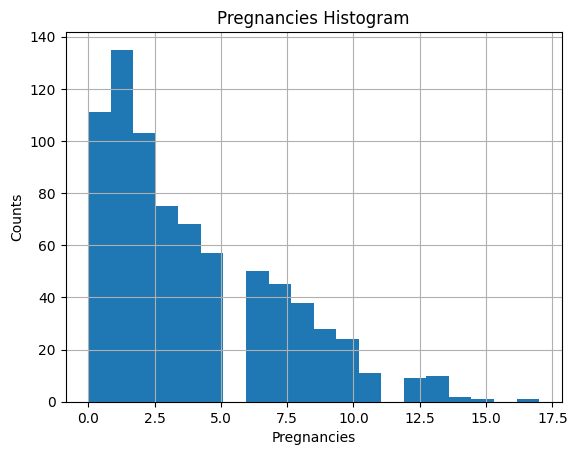

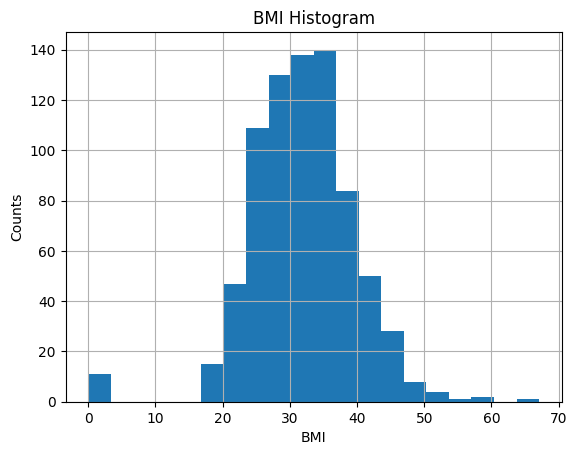

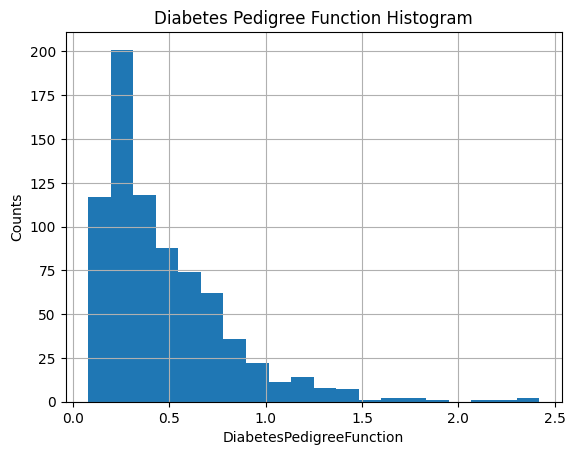

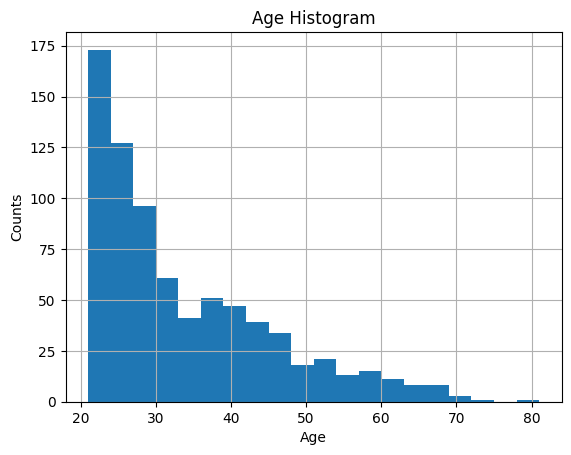

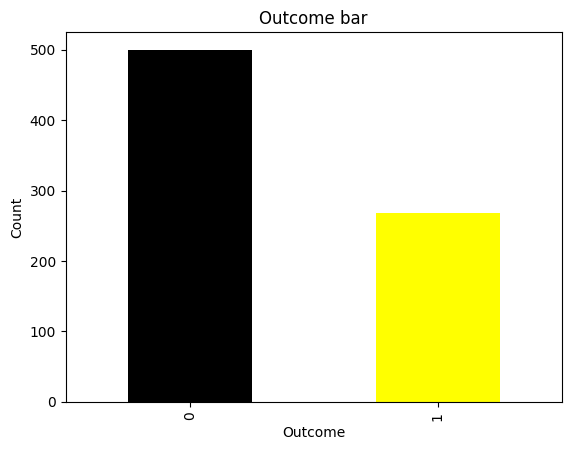

In [6]:
df['Insulin'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

df['Glucose'].hist(bins=20)
plt.title('Glucose Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

df['BloodPressure'].hist(bins=20)
plt.title('Blood Pressure Histogram')
plt.xlabel('BloodPressure')
plt.ylabel('Counts')
plt.show()

df['SkinThickness'].hist(bins=20)
plt.title('Skin Thickness Histogram')
plt.xlabel('SkinThickness')
plt.ylabel('Counts')
plt.show()

df['Pregnancies'].hist(bins=20)
plt.title('Pregnancies Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()

df['BMI'].hist(bins=20)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()

df['DiabetesPedigreeFunction'].hist(bins=20)
plt.title('Diabetes Pedigree Function Histogram')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Counts')
plt.show()

df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()


counts = df['Outcome'].value_counts()
counts.plot(kind='bar', color=['black', 'yellow'])
plt.title('Outcome bar')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Quality of data

Έχω τις εξής τρεις (3) παρατηρήσεις:

1. Τα ιστογράμματα των Glucose, BloodPressure και BMI μου φαίνονται να ακολουθούν ακολουθούν την ίδια κατανομή (περίπου). Και τα τρία ιστογράμματα έχουν τη λεγόμενη "καμπάνα" το οποίο μας βοηθάει γιατί τα περισσότερα δεδομένα είναι κοντά στο mean (με βάση το visual η σειρά θα ήταν η παρακάτω: BMI, BloodPressure, Glucose καθώς το τελευταίο ιστόγραμμα έχει μια μεγαλύτερη συγκέντρωση στο δεξί άκρο, προς το max).

2. Το δεύτερο θα έλεγα πως είναι μία κοινή παρατήρηση που υπάρχει στα attrs Insulin, SkinThickness, DiabetesPedigreeFunction και Pregnancies. Όλα τα ιστογράμματά τους έχουν μία δεξιά κλίση/κυρτότητα (δεξιότερα μειώνονται τα δεδομένα και δεν ακολουθούν το mean όπως στο πρώτο σκέλος).

3. Το τρίτο που με προβληματίζει, πηγάζει και από το προηγούμενο μέρος με τον πίνακα των στατιστικών, είναι πως υπάρχει μεγάλη απόσταση μεταξύ των max για Insulin (846) και SkinThickness (99). Δε μπορώ να καταλάβω αν είναι κάποια edge cases ή φταίει το δείγμα, παρόλα αυτά με προβληματίζει η μεγάλη διαφορά ανεξάρτητα της αιτίας.

# Age attribute analysis

Δεν είναι κανονική κατανομή. Η κλίση/κυρτότητα του ιστογράμματος είναι δεξιά (λιγότερες μαζεμένες μεγάλες ηλικίες, και περισσότερες νεαρές ηλικίες), οπότε η κατανομή είναι ασύμμετρη. Το δεύτερο που θα ήθελα να αναφέρω, είναι πως δεν έχει 0νικά στο δείγμα, οπότε φαίνεται πλήρες δείγμα.


Τέλος, πέραν της μαθηματικής προσέγγισης, επειδή η ηλικία είναι σημαντική για θέματα υγείας, πιστεύω θα παίξει σημαντικό ρόλο (ίσως να έχει όμως μεγαλύτερο bias για τις μικρές ηλικίες λόγω μεγαλύτερο πλήθους δεδομένων σε σχέση με τις μεγάλες ηλικίες).

# Glucose - Outcome correlation

για το 75% του δείγματος έχουμε:

6.000000	**140.250000 (Glucose)**	80.000000	32.000000	127.250000	36.600000	0.626250	41.000000	1**.000000 (Outcome)**

Από τα δεδομένα που υπολογίσαμε στο 'df.describe()' φαίνεται ότι για το 75% του δείγματος διαγραμματικά, όσοι έχουν 140.250+ γλυκόζη έχουν και διαβήτη (1.00).

Εάν δε, συνυπολογίσουμε, ότι η μέση γλυκόζη είναι περίπου 121 και το 50% του δείγματος έχει από 117 γλυκόζη και πάνω, τότε ναι η γλυκόζη παίζει μεγάλο ρόλο στο αν κάποιος έχει διαβήτη ή οχι (λίγο πιο κάτω από το 50% του δείγματος).

# Train & Test preparations

In [7]:
# prepare the dataset creating numpy arrays by spliting Outcome and the rest attrs
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

# create the training & testing sets for Outcome & the rest attrs respectively
seed = 0
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((691, 8), (77, 8), (691,), (77,))

# Creationg and training of the Logistic Regression (it's a classification method despite the regression name)

In [8]:
# create the model using a configured methodology
model = LogisticRegression(max_iter=1000, random_state=seed)

# training section
model.fit(x_train, y_train)

# testing section
y_pred = model.predict(x_test)

# measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

accuracy_percentage

87.01

Εφόσον το prediction είναι πολύ κοντά στο 100% (και θεωρείται θετικό αποτέλεσμα για το test set), σημαίνει πως το training set μας ήταν ρεαλιστικό. Επομένως η μεθοδολογία αυτή (Logistic Regression) καθώς και ο διαμοιρασμός training & test δεδομένων φαίνεται να απέδωσαν αποτελεσματικά.

# Age filtering

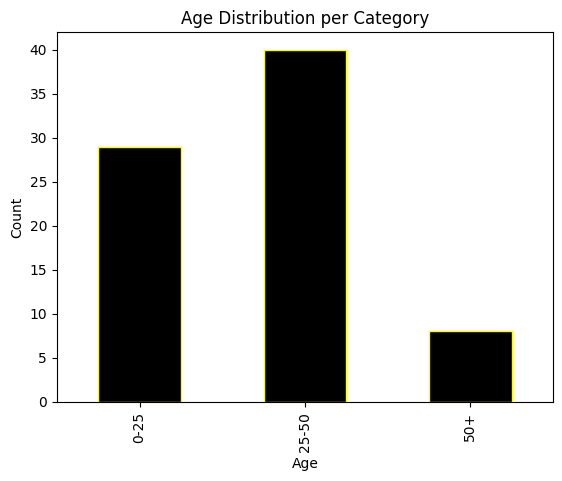

In [9]:
age_index = input_df.columns.get_loc('Age')
age_test = x_test[:, age_index]
age_test, y_pred

ranges = [0, 25, 50, 120]
labels = ['0-25', '25-50', '50+']

age_categories = pd.cut(age_test, bins=ranges, labels=labels)
age_counter = age_categories.value_counts().sort_index()

age_counter.plot(kind='bar', color='black', edgecolor='yellow')
plt.title('Age Distribution per Category')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# Stochastic explanation

Πιστεύως πως θα ήταν καλύτερα να προβλέψει ότι έχει διαβήτη, και μετά από έναν έλεγχο δια ζώσης να διαπιστωθεί πως δεν έχει, παρά το αντίθετο σενάριο.

Στην πραγματική ζωή όμως, σημαντική προϋπόθεση είναι η επανεξέταση του ασθενή με σκοπό την επιβεβαίωση της πρόβλεψης και όχι ο χαρακτηρισμός του ως πάγιο ασθενή μόνο με την πρόβλεψη.

# Loop & seed states

In [10]:
seeds = list(range(10))
total_accuracies = []

for seed in seeds:
    # prepare the dataset creating numpy arrays by spliting Outcome and the rest attrs
    input_df = df.drop(columns=['Outcome'])
    targets_df = df['Outcome']
    x = input_df.to_numpy()
    y = targets_df.to_numpy()
    x.shape, y.shape

    # create the training & testing sets for Outcome & the rest attrs respectively
    test_size = 0.1
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
    x_train.shape, x_test.shape, y_train.shape, y_test.shape

    # create the model using a configured methodology
    model = LogisticRegression(max_iter=1000, random_state=seed)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # measure the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_percentage = round(accuracy*100, 2)
    total_accuracies.append(accuracy_percentage)

mean_accuracy = np.mean(total_accuracies)
std_accuracy = np.std(total_accuracies)
print(round(mean_accuracy, 2))
print(round(std_accuracy, 2))

77.92
4.93


# Min-Max normalization

In [11]:
normalization_min_max = (input_df - input_df.min(axis=0)) / (input_df.max(axis=0) - input_df.min(axis=0))

df_normalized = pd.concat([normalization_min_max, df['Outcome']], axis=1)

# Post-normalization analysis (correlation)

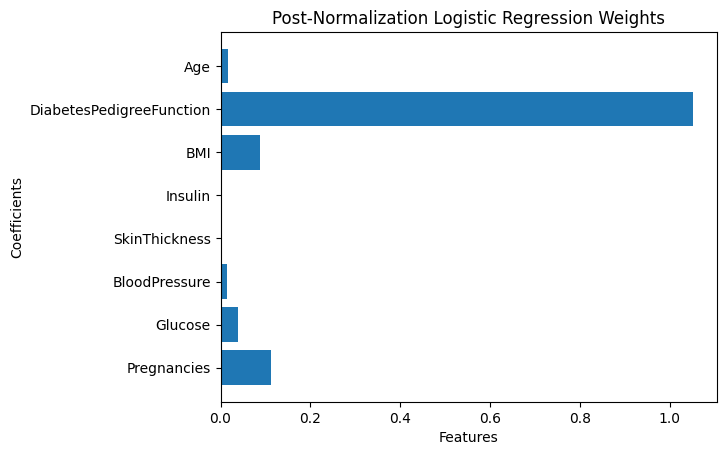

In [12]:
# using the updated data (normalized) excluding the Outcome attribute
needed_data = df_normalized.drop(columns=['Outcome'])

# coeff and weights analysis
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(needed_data.columns, importance_weights)
plt.title('Post-Normalization Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Με βάση το διάγραμμα στο προηγούμενο βήμα, τα τρία πρώτα attributes σε σημαντικότητα και correlation είναι τα παρακάτων (σε σειρά): DiabetesPedigreeFunction, Pregnancies, BMI. Όμως φαίνεται πως τα αποτελέσματα παραμένουν ίδια μετά την χρήση του Min-Max ενώ πίστευτα πως θα υπήρχε βελτίωση (άρα τα δεδομένα είναι ποιοτικά, και δε χρειάζονται παραπάνω βελτιστοποίηση).



---





---



# Second exercise section

# First part

In [13]:
df = pd.read_csv('diabetes.csv')

# prepare the dataset creating numpy arrays by spliting Outcome and the rest attrs
input_df = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']]
targets_df = df['Glucose']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

# create the training & testing sets for Outcome & the rest attrs respectively
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((537, 4), (231, 4), (537,), (231,))

In [16]:
# create the model using a configured methodology
model = LinearRegression()

# training section
model.fit(x_train, y_train)

# testing section
y_pred = model.predict(x_test)

# measure the efficiency by calculating the MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 929.8883492746899
Mean Absolute Error (MAE): 23.599990462075155


Πιστεύ πως επειδή στο δείγμα έχουμε πολλές ακραίες τιμές, το ΜΑΕ είναι καλύτερο, καθώς βεβαιώνει πως οι προβλέψεις θα ακολουθούν καλύτερα την πραγματικότητα (αφού υπολογίζει τη μέση διαφορά ανάμεσα σε πραγματικές/προβλεπόμενες τιμές, χωρίς να επηρεάζεται από τις ακραίες).

In [17]:
alpha_values = [0.2, 0.4, 0.6, 0.8, 1.0]
results = []
for alpha in alpha_values:
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    results.append({'Alpha': alpha, 'MAE': mae})

results_df = pd.DataFrame(results)
results_df

,Alpha,MAE
0,0.2,23.594203
1,0.4,23.588415
2,0.6,23.582629
3,0.8,23.576843
4,1.0,23.571058
